In [1]:
import matplotlib.pyplot as plt, numpy as np
plt.style.use('lgb-notebook.mplstyle')
%matplotlib inline
import pandas as pd

In [2]:
fpath = '../results/injrecovresult/irresult_sap_top1.csv'
df = pd.read_csv(fpath)

In [3]:
df.head()

,P_inj,P_rec,ap,coarseperiod,depth,foundinj,kebc_period,kicid,morph,rms_biased,t0_inj,t0_rec
0,24.059373,24.059413,sap,24.059245,0.02000,True,0.751098,10905804,0.68,0.002870,149.951390,149.918042
1,21.991259,21.991349,sap,21.991503,0.01000,True,0.751098,10905804,0.68,0.002801,144.298474,144.267488
2,21.233928,21.233390,sap,21.233242,0.00500,True,0.751098,10905804,0.68,0.002530,142.053174,142.049460
3,4.978177,4.978211,sap,4.978201,0.00250,True,0.751098,10905804,0.68,0.002537,135.324142,135.314554
4,4.858769,4.858818,sap,4.858813,0.00125,True,0.751098,10905804,0.68,0.002486,132.796216,132.781552


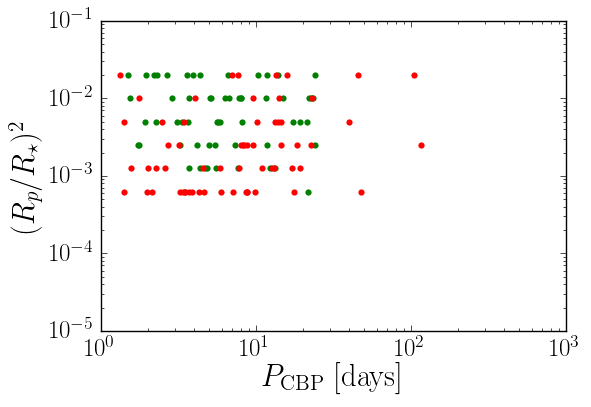

In [4]:
f, ax = plt.subplots()

ax.scatter(df['P_inj'][df['foundinj']==True],
           df['depth'][df['foundinj']==True],
           c='green', lw=0)
ax.scatter(df['P_inj'][df['foundinj']==False],
           df['depth'][df['foundinj']==False],
           c='red', lw=0)

ax.set(xlabel='$P_\mathrm{CBP}\ [\mathrm{days}]$',
       ylabel='$(R_p/R_\star)^2$',
       xscale='log',
       yscale='log')

plt.savefig('completeness_depth_vs_periodcbp.pdf')
plt.show()

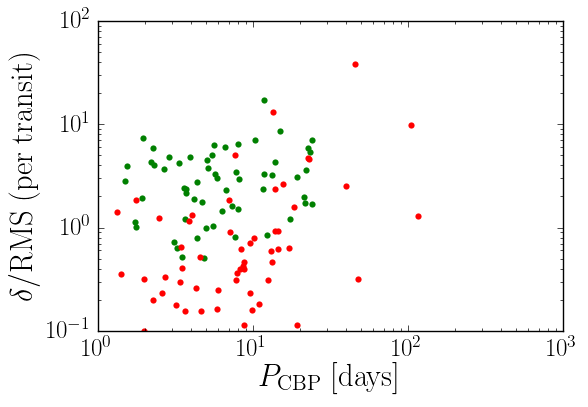

In [5]:
f, ax = plt.subplots()

ax.scatter(df['P_inj'][df['foundinj']==True],
           df['depth'][df['foundinj']==True]/df['rms_biased'][df['foundinj']==True],
           c='green', lw=0)
ax.scatter(df['P_inj'][df['foundinj']==False],
           df['depth'][df['foundinj']==False]/df['rms_biased'][df['foundinj']==False],
           c='red', lw=0)

ax.set(xlabel='$P_\mathrm{CBP}\ [\mathrm{days}]$',
       ylabel='$\delta/\mathrm{RMS\ (per\ transit)}$',
       xscale='log',
       yscale='log')

plt.savefig('completeness_SNR_vs_periodcbp.pdf')
plt.show()

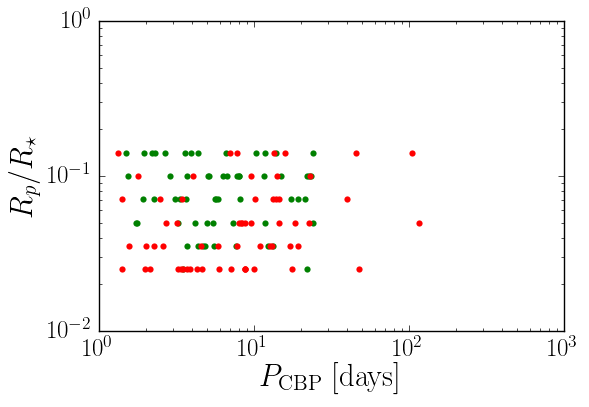

In [6]:
f, ax = plt.subplots()

ax.scatter(df['P_inj'][df['foundinj']==True],
           np.sqrt(df['depth'][df['foundinj']==True]),
           c='green', lw=0)
ax.scatter(df['P_inj'][df['foundinj']==False],
           np.sqrt(df['depth'][df['foundinj']==False]),
           c='red', lw=0)

ax.set(xlabel='$P_\mathrm{CBP}\ [\mathrm{days}]$',
       ylabel='$R_p/R_\star$',
       xscale='log',
       yscale='log')

plt.savefig('completeness_RpbyRs_vs_periodcbp.pdf')
plt.show()

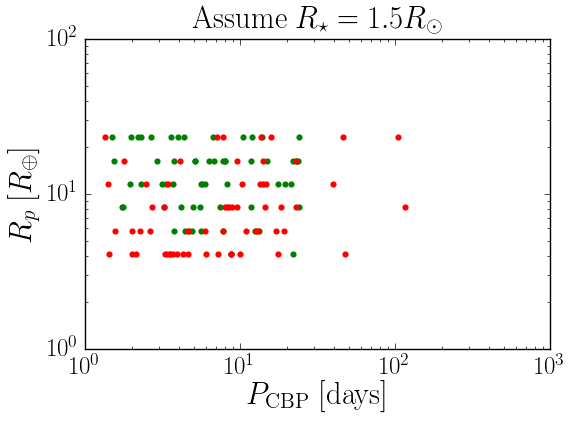

In [7]:
import astropy.units as u
import astropy.constants as c

f, ax = plt.subplots()

δdet = np.array(np.sqrt(df['depth'][df['foundinj']==True]))*1.5*u.Rsun
δnotdet = np.array(np.sqrt(df['depth'][df['foundinj']==False]))*1.5*u.Rsun

ax.scatter(df['P_inj'][df['foundinj']==True],
           δdet.to(u.Rearth),
           c='green', lw=0)
ax.scatter(df['P_inj'][df['foundinj']==False],
           δnotdet.to(u.Rearth),
           c='red', lw=0)

ax.set(xlabel='$P_\mathrm{CBP}\ [\mathrm{days}]$',
       ylabel='$R_p\ [R_\oplus]$',
       title='$\mathrm{Assume}\ R_\star = 1.5R_\odot$',
       xscale='log',
       yscale='log')

plt.savefig('completeness_Rp_vs_periodcbp.pdf')
plt.show()

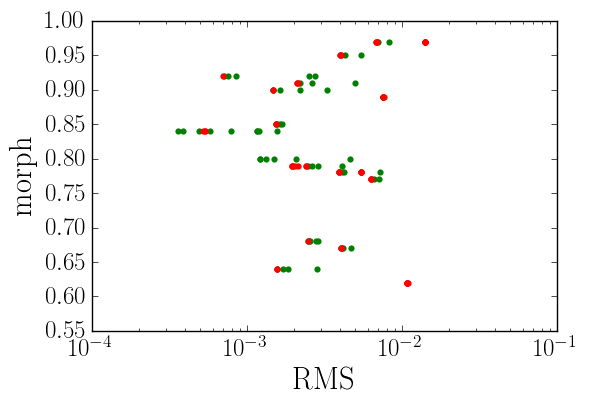

In [11]:
import astropy.units as u
import astropy.constants as c

f, ax = plt.subplots()

ax.scatter(df['rms_biased'][df['foundinj']==True],
           df['morph'][df['foundinj']==True],
           c='green', lw=0)
ax.scatter(df['rms_biased'][df['foundinj']==False],
           df['morph'][df['foundinj']==False],
           c='red', lw=0)

ax.set(xlabel='$\mathrm{RMS}$',
       ylabel='$\mathrm{morph}$',
       xscale='log',
       yscale='linear')

plt.savefig('completeness_morph_vs_RMS.pdf')
plt.show()